In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import statsmodels.api as sm


In [39]:
pd.set_option('display.max_columns', None)

In [40]:
numerical = pd.read_csv('numerical.csv')
numerical.shape

(95412, 315)

In [41]:
dtypes_dict = numerical.dtypes.to_dict()
for column, dtype in dtypes_dict.items():
    print(f'{column}: {dtype}')
#I don't think we have to change any data type

TCODE: int64
AGE: float64
INCOME: int64
WEALTH1: int64
HIT: int64
MALEMILI: int64
MALEVET: int64
VIETVETS: int64
WWIIVETS: int64
LOCALGOV: int64
STATEGOV: int64
FEDGOV: int64
WEALTH2: int64
POP901: int64
POP902: int64
POP903: int64
POP90C1: int64
POP90C2: int64
POP90C3: int64
POP90C4: int64
POP90C5: int64
ETH1: int64
ETH2: int64
ETH3: int64
ETH4: int64
ETH5: int64
ETH6: int64
ETH7: int64
ETH8: int64
ETH9: int64
ETH10: int64
ETH11: int64
ETH12: int64
ETH13: int64
ETH14: int64
ETH15: int64
ETH16: int64
AGE901: int64
AGE902: int64
AGE903: int64
AGE904: int64
AGE905: int64
AGE906: int64
AGE907: int64
CHIL1: int64
CHIL2: int64
CHIL3: int64
AGEC1: int64
AGEC2: int64
AGEC3: int64
AGEC4: int64
AGEC5: int64
AGEC6: int64
AGEC7: int64
CHILC1: int64
CHILC2: int64
CHILC3: int64
CHILC4: int64
CHILC5: int64
HHAGE1: int64
HHAGE2: int64
HHAGE3: int64
HHN1: int64
HHN2: int64
HHN3: int64
HHN4: int64
HHN5: int64
HHN6: int64
MARR1: int64
MARR2: int64
MARR3: int64
MARR4: int64
HHP1: int64
HHP2: int64
DW1: i

In [42]:
categorical = pd.read_csv('categorical.csv')
categorical.shape

(95412, 22)

In [43]:
categorical.dtypes
#also here nothing to be changed

STATE           object
CLUSTER          int64
HOMEOWNR        object
GENDER          object
DATASRCE         int64
RFA_2R          object
RFA_2A          object
GEOCODE2        object
DOMAIN_A        object
DOMAIN_B         int64
ODATEW_YR        int64
ODATEW_MM        int64
DOB_YR           int64
DOB_MM           int64
MINRDATE_YR      int64
MINRDATE_MM      int64
MAXRDATE_YR      int64
MAXRDATE_MM      int64
LASTDATE_YR      int64
LASTDATE_MM      int64
FIRSTDATE_YR     int64
FIRSTDATE_MM     int64
dtype: object

In [44]:
targets = pd.read_csv('target.csv')
targets.head()

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


In [45]:
all_data = pd.concat((numerical,categorical, targets),axis=1)
all_data.shape

(95412, 339)

In [46]:
X = all_data.drop(columns=['TARGET_B','TARGET_D'])
y = all_data['TARGET_B']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

train_num = X_train[numerical_cols]
train_cat = X_train[categorical_cols]
test_num = X_test[numerical_cols]
test_cat = X_test[categorical_cols]

In [48]:
# Choose scaler
scaler = StandardScaler()  # Or use MinMaxScaler()

# Choose encoder
encoder = OneHotEncoder(drop='first', sparse=False)  # Or use OrdinalEncoder()

# Scale and encode
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numerical_cols),
        ('cat', encoder, categorical_cols)
    ]
)

# Fit on training data and transform both training and test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert back to DataFrame to combine numerical and categorical parts
X_train = pd.DataFrame(X_train_processed, columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(X_test_processed, columns=preprocessor.get_feature_names_out())


C:\Users\m-syr\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [49]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\m-syr\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.95


In [51]:
from collections import Counter
class_counts = Counter(y_train)
print(f'Class distribution in the training set: {class_counts}')

Class distribution in the training set: Counter({0: 72464, 1: 3865})


In [52]:
from sklearn.utils import resample
train_data = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
majority_class = train_data[train_data['TARGET_B'] == 0]
minority_class = train_data[train_data['TARGET_B'] == 1]

In [53]:
#Upsample
minority_upsampled = resample(minority_class,
                              replace=True,  # Sample with replacement
                              n_samples=len(majority_class),  # Match number of majority class
                              random_state=42)

upsampled_data = pd.concat([majority_class, minority_upsampled])

In [54]:
# Separate features and target
X = upsampled_data.drop('TARGET_B', axis=1)
y = upsampled_data['TARGET_B']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [56]:
#cat/num X-train
#make a split between the continuous and discrete variables as I don't want to scale or encode the discrete ones, I want to keep their current values
X_train_num = X_train.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(object)

#cat/num X-test
X_test_num = X_test.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(object)


from sklearn.preprocessing import StandardScaler
#Scale X-train
transformer = StandardScaler().fit(X_train_num)
X_scaled_train = pd.DataFrame(transformer.transform(X_train_num),columns=X_train_num.columns)

#Scale X-test
X_scaled_test = pd.DataFrame(transformer.transform(X_test_num),columns=X_test_num.columns)
X_scaled_test

,num__TCODE,num__AGE,num__INCOME,num__WEALTH1,num__HIT,num__MALEMILI,num__MALEVET,num__VIETVETS,num__WWIIVETS,num__LOCALGOV,num__STATEGOV,num__FEDGOV,num__WEALTH2,num__POP901,num__POP902,num__POP903,num__POP90C1,num__POP90C2,num__POP90C3,num__POP90C4,num__POP90C5,num__ETH1,num__ETH2,num__ETH3,num__ETH4,num__ETH5,num__ETH6,num__ETH7,num__ETH8,num__ETH9,num__ETH10,num__ETH11,num__ETH12,num__ETH13,num__ETH14,num__ETH15,num__ETH16,num__AGE901,num__AGE902,num__AGE903,num__AGE904,num__AGE905,num__AGE906,num__AGE907,num__CHIL1,num__CHIL2,num__CHIL3,num__AGEC1,num__AGEC2,num__AGEC3,num__AGEC4,num__AGEC5,num__AGEC6,num__AGEC7,num__CHILC1,num__CHILC2,num__CHILC3,num__CHILC4,num__CHILC5,num__HHAGE1,num__HHAGE2,num__HHAGE3,num__HHN1,num__HHN2,num__HHN3,num__HHN4,num__HHN5,num__HHN6,num__MARR1,num__MARR2,num__MARR3,num__MARR4,num__HHP1,num__HHP2,num__DW1,num__DW2,num__DW3,num__DW4,num__DW5,num__DW6,num__DW7,num__DW8,num__DW9,num__HV1,num__HV2,num__HV3,num__HV4,num__HU1,num__HU2,num__HU3,num__HU4,num__HU5,num__HHD1,num__HHD2,num__HHD3,num__HHD4,num__HHD5,num__HHD6,num__HHD7,num__HHD8,num__HHD9,num__HHD10,num__HHD11,num__HHD12,num__ETHC1,num__ETHC2,num__ETHC3,num__ETHC4,num__ETHC5,num__ETHC6,num__HVP1,num__HVP2,num__HVP3,num__HVP4,num__HVP5,num__HVP6,num__HUR1,num__HUR2,num__RHP1,num__RHP2,num__RHP3,num__RHP4,num__HUPA1,num__HUPA2,num__HUPA3,num__HUPA4,num__HUPA5,num__HUPA6,num__HUPA7,num__RP1,num__RP2,num__RP3,num__RP4,num__MSA,num__ADI,num__DMA,num__IC1,num__IC2,num__IC3,num__IC4,num__IC5,num__IC6,num__IC7,num__IC8,num__IC9,num__IC10,num__IC11,num__IC12,num__IC13,num__IC14,num__IC15,num__IC16,num__IC17,num__IC18,num__IC19,num__IC20,num__IC21,num__IC22,num__IC23,num__HHAS1,num__HHAS2,num__HHAS3,num__HHAS4,num__MC1,num__MC2,num__MC3,num__TPE1,num__TPE2,num__TPE3,num__TPE4,num__TPE5,num__TPE6,num__TPE7,num__TPE8,num__TPE9,num__PEC1,num__PEC2,num__TPE10,num__TPE11,num__TPE12,num__TPE13,num__LFC1,num__LFC2,num__LFC3,num__LFC4,num__LFC5,num__LFC6,num__LFC7,num__LFC8,num__LFC9,num__LFC10,num__OCC1,num__OCC2,num__OCC3,num__OCC4,num__OCC5,num__OCC6,num__OCC7,num__OCC8,num__OCC9,num__OCC10,num__OCC11,num__OCC12,num__OCC13,num__EIC1,num__EIC2,num__EIC3,num__EIC4,num__EIC5,num__EIC6,num__EIC7,num__EIC8,num__EIC9,num__EIC10,num__EIC11,num__EIC12,num__EIC13,num__EIC14,num__EIC15,num__EIC16,num__OEDC1,num__OEDC2,num__OEDC3,num__OEDC4,num__OEDC5,num__OEDC6,num__OEDC7,num__EC1,num__EC2,num__EC3,num__EC4,num__EC5,num__EC6,num__EC7,num__EC8,num__SEC1,num__SEC2,num__SEC3,num__SEC4,num__SEC5,num__AFC1,num__AFC2,num__AFC3,num__AFC4,num__AFC5,num__AFC6,num__VC1,num__VC2,num__VC3,num__VC4,num__ANC1,num__ANC2,num__ANC3,num__ANC4,num__ANC5,num__ANC6,num__ANC7,num__ANC8,num__ANC9,num__ANC10,num__ANC11,num__ANC12,num__ANC13,num__ANC14,num__ANC15,num__POBC1,num__POBC2,num__LSC1,num__LSC2,num__LSC3,num__LSC4,num__VOC1,num__VOC2,num__VOC3,num__HC1,num__HC2,num__HC3,num__HC4,num__HC5,num__HC6,num__HC7,num__HC8,num__HC9,num__HC10,num__HC11,num__HC12,num__HC13,num__HC14,num__HC15,num__HC16,num__HC17,num__HC18,num__HC19,num__HC20,num__HC21,num__MHUC1,num__MHUC2,num__AC1,num__AC2,num__CARDPROM,num__NUMPROM,num__CARDPM12,num__NUMPRM12,num__RAMNTALL,num__NGIFTALL,num__CARDGIFT,num__MINRAMNT,num__MAXRAMNT,num__LASTGIFT,num__TIMELAG,num__AVGGIFT,num__CONTROLN,num__HPHONE_D,num__RFA_2F,num__CLUSTER2,num__CLUSTER,num__DATASRCE,num__DOMAIN_B,num__ODATEW_YR,num__ODATEW_MM,num__DOB_YR,num__DOB_MM,num__MINRDATE_YR,num__MINRDATE_MM,num__MAXRDATE_YR,num__MAXRDATE_MM,num__LASTDATE_YR,num__LASTDATE_MM,num__FIRSTDATE_YR,num__FIRSTDATE_MM,cat__STATE_FL,cat__STATE_GA,cat__STATE_IL,cat__STATE_IN,cat__STATE_MI,cat__STATE_MO,cat__STATE_NC,cat__STATE_TX,cat__STATE_WA,cat__STATE_WI,cat__STATE_other,cat__HOMEOWNR_U,cat__GENDER_M,cat__GENDER_other,cat__RFA_2A_E,cat__RFA_2A_F,cat__RFA_2A_G,cat__GEOCODE2_B,cat__GEOCODE2_C,cat__GEOCODE2_D,cat__DOMAIN_A_R,cat__DOMAIN_A_S,cat__DOMAIN_A_T,cat__DOMAIN_A_U
0,-0.059570,-0.020757,0.482092,0.715607,-0.354400,-0.007364,0.733693,1.085933,-1.161846,0.736961,-0.8

In [57]:
from sklearn.preprocessing import OneHotEncoder
#Create encoder
encoder = OneHotEncoder(drop='first').fit(X_train_cat)

#encode train
encoded_train = encoder.transform(X_train_cat).toarray()
encoded_train = pd.DataFrame(encoded_train)

#encode test
encoded_test = encoder.transform(X_test_cat).toarray()
encoded_test = pd.DataFrame(encoded_test)

In [58]:
train_scaled = pd.concat([encoded_train,X_scaled_train],axis=1)
test_scaled = pd.concat([encoded_test,X_scaled_test],axis=1)
df = pd.concat([test_scaled,train_scaled],axis=0)

In [59]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)
clf.fit(train_scaled, y_train)
print(clf.score(train_scaled, y_train))
print(clf.score(test_scaled, y_test))

0.623337834774123
0.6171025092573427


In [60]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)
cross_val_scores = cross_val_score(clf, train_scaled, y_train, cv=10)
print(np.mean(cross_val_scores))
print(cross_val_scores)

0.6178178439441971
[0.6178413  0.61399704 0.61034993 0.61281419 0.63035978 0.62395269
 0.60857565 0.61754559 0.62247413 0.62026814]


In [69]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [62]:
clf = RandomForestClassifier(max_depth=10,
                             min_samples_split=20,
                             min_samples_leaf =20).fit(train_scaled, y_train)

pred_RF = clf.predict(test_scaled)

print('accuracy:', accuracy_score(y_test, pred_RF))
print("precision: ",precision_score(y_test,pred_RF))
print("recall: ",recall_score(y_test,pred_RF))
print("f1: ",f1_score(y_test,pred_RF))

accuracy: 0.8209940431012672
precision:  0.7977666440217391
recall:  0.8615250584621028
f1:  0.8284208901920153


In [78]:

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

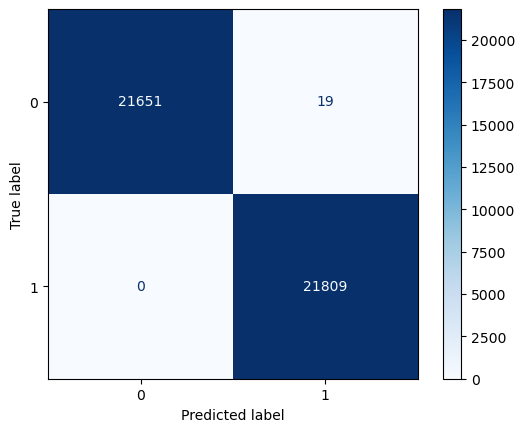

In [79]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

In [80]:
target_d = targets[targets['TARGET_D']!=0]
round(target_d['TARGET_D'].mean(),2)

15.62

In [72]:
donation_gained = 11236 * 15.62
donation_lost = 7018 * 15.62
spend_marketing = (7072+11236) * 0.68
no_return_marketing = 7072 * 0.68

print('Donation amount gained:',round(donation_gained,2))
print('Donation amount lost:',round(donation_lost,2))
print('Amount spend on marketing:',round(spend_marketing,2))
print('Amount lost on marketing:',round(no_return_marketing,2))

Donation amount gained: 175506.32
Donation amount lost: 109621.16
Amount spend on marketing: 12449.44
Amount lost on marketing: 4808.96


In [ ]:
#this is from last lab
#Downsample
majority_downsampled = resample(majority_class,
                                replace=False,  # Sample without replacement
                                n_samples=len(minority_class),  # Match number of minority class
                                random_state=42)
downsampled_data = pd.concat([minority_class, majority_downsampled])

In [ ]:
X_train_downsampled = downsampled_data.drop('TARGET_B', axis=1)
y_train_downsampled = downsampled_data['TARGET_B']

In [ ]:
def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    return accuracy

In [ ]:
# Original data
print("Original data:")
fit_and_evaluate(X_train, y_train, X_test, y_test)

# Upsampled data
print("Upsampled data:")
fit_and_evaluate(X_train_upsampled, y_train_upsampled, X_test, y_test)

# Downsampled data
print("Downsampled data:")
fit_and_evaluate(X_train_downsampled, y_train_downsampled, X_test, y_test)